### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [117]:
data = pd.read_csv('data/coupons.csv')

In [118]:
data.head()
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [119]:
#Hi, my name's Raatib Tanvir, this is my submission for our first project/large assignment! Super pumped.
#Let's make a df with only missing data. Then we can also count per column.
missing_values_data = data.isnull()
missing_values_count = data.isnull().sum()
print(missing_values_count)
#This gives us an idea. We have a large number of empty values in the car column. Let's check out the total entries in that column.
#(This will help us determine whether that column has too many empty values to just fill, or if we can happily fill them)
car_count = data['car'].value_counts().sum()
print('Available data count in car: ', car_count)
#Wow, this car column only has 108 values filled in. We'll take note of that. It isn't too valuable.
other_missing_columns_count = data[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']].value_counts().sum()
print('Available data count in other columns with missing data: ', other_missing_columns_count)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Available data count in car:  108
Available data count in other columns with missing data:  12079


3. Decide what to do about your missing data -- drop, replace, other...

In [120]:
#Here's what it would look like if we decided to drop all rows of data who omit a value, with the exception of the car category.
data_dropped_subset = data.dropna(subset=['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
# data_dropped_subset.info

#The truth is, if we want to analyze by specific columns later, we may be dropping important data here. This new dataset has dropped about 500 rows.
#Instead, we will perform dropna() based around a specific columnn later when we analyze data where that column is particularly important to our findings.

4. What proportion of the total observations chose to accept the coupon?



In [121]:
#The Y column, which denotes whether a given observation accepted the coupon (Y='1') or did not (Y='0'). Note that the 'Y' column has no missing data according to our previous analysis.
Y_values = data['Y'].count()
Y_equals_1 = data['Y'].sum()
# print(Y_values, Y_equals_1)
proportion_accepted = Y_equals_1/Y_values
print(proportion_accepted)
print('In essence, about 56.8% of participants accepted the coupon!')

0.5684326710816777
In essence, about 56.8% of participants accepted the coupon!


5. Use a bar plot to visualize the `coupon` column.

/var/folders/c3/8p70qn2s1x99513gq9z99mgw0000gn/T/ipykernel_62233/2864504552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data['coupon'].value_counts(),palette='Set1')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

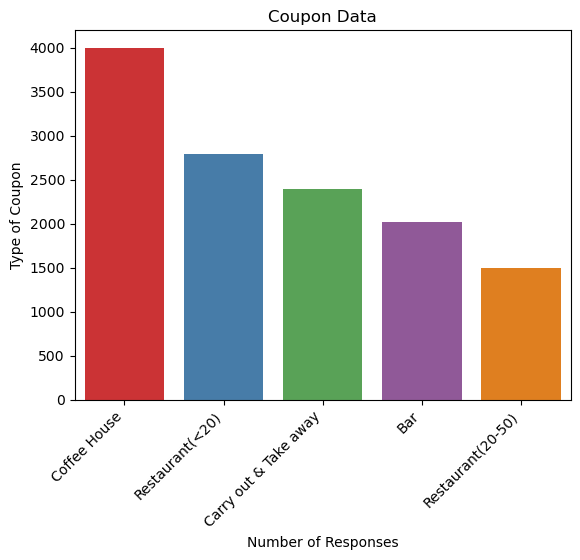

In [122]:
#Using matplotlib .plot(kind='bar')
# coupon_counts = data['coupon'].value_counts()
# coupon_counts.plot(kind='bar',xlabel = 'Coupon Type', ylabel = 'Number of Responses', title='Coupon Data')

#Using seaborn sns.barplot()
sns.barplot(data=data['coupon'].value_counts(),palette='Set1')
plt.xlabel('Number of Responses')
plt.ylabel('Type of Coupon')
plt.title('Coupon Data')
plt.xticks(rotation=45, ha='right')


This gives us a great read on which coupon types are the most desired. A great visualization of the data for us to work with.

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Data')

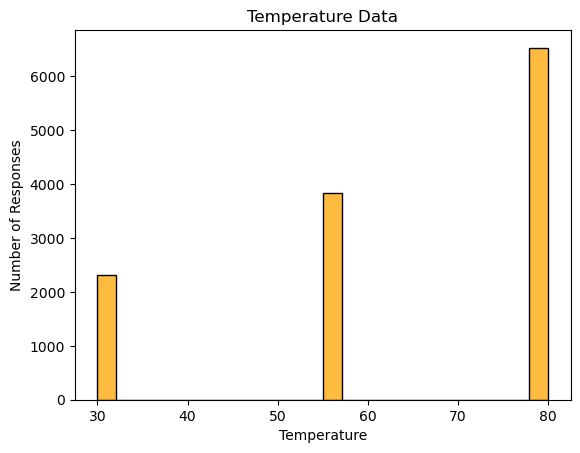

In [123]:
# Using .plot(kind='hist')
# data['temperature'].plot(kind='hist',xlabel = 'Temperature', ylabel = 'Number of Responses', title='Temperature Data', color = 'orange')


#Using sns.histplot
sns.histplot(data=data['temperature'],color='orange',edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Number of Responses')
plt.title('Temperature Data')


We can note how many responses are in the 80F temperature category. Another important visualization to guide our efforts.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [124]:
bar_data = data.loc[data['coupon']=='Bar']
# bar_data.info
# 2017 rows

2. What proportion of bar coupons were accepted?


In [125]:
#We use the Y column again. It denotes whether a given observation accepted the coupon (Y='1') or did not (Y='0').
bar_Y_equals_1 = bar_data['Y'].sum()
bar_Y_values = bar_data['Y'].count()
bar_proportion_accepted = bar_Y_equals_1/bar_Y_values
print(bar_proportion_accepted)

0.41001487357461575


Interestingly, on average, only about 41% of bar responses were an acceptance! This contrasts our overall data, which indicated a majority of respondants accepted the coupon

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [126]:
more_than_three=bar_data.loc[(bar_data['Bar']=='4~8') | (bar_data['Bar']=='gt8')]
three_or_less=bar_data.loc[(bar_data['Bar']!='4~8') & (bar_data['Bar']!='gt8')]

more_than_three_acceptance_rate = more_than_three['Y'].sum() / more_than_three['Y'].count()
three_or_less_acceptance_rate = three_or_less['Y'].sum() / three_or_less['Y'].count()
print('More than three acceptance rate: ',more_than_three_acceptance_rate)
print('Three or less acceptance rate: ',three_or_less_acceptance_rate)
print('Proportion of more than three rate to three or less rate: ',more_than_three_acceptance_rate / three_or_less_acceptance_rate)
print('Those who went to a bar more than 3 times a month were about twice as likely to accept the coupon than those who went fewer times.')


More than three acceptance rate:  0.7688442211055276
Three or less acceptance rate:  0.37073707370737075
Proportion of more than three rate to three or less rate:  2.0738261038128325
Those who went to a bar more than 3 times a month were about twice as likely to accept the coupon than those who went fewer times.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [127]:
#Let's select away those who put "less than once" or "never" for bar visits and those whose age was in the less than 21 or 21-25 ranges.
more_than_once_over_25 = bar_data.loc[(bar_data['Bar'] != 'less1') & (bar_data['Bar'] != 'never') & (bar_data['age'] != '21') & (bar_data['age'] != 'below21')]
# more_than_once_over_25.info
#There are 440 results (rows) out of the total 2017 of the bar data

# Let's do a merge to find "all others", aka those in the bar dataframe that do not overlap with more_than_once_over_25
# To do that, we can do a left merge on the main bar dataframe, create an indicator for which rows are only in the left dataframe, and select those rows
all_others = bar_data.merge(more_than_once_over_25, on=more_than_once_over_25.columns.to_list(), how='left', indicator=True)
all_others = all_others.loc[all_others._merge=='left_only',all_others.columns!='_merge']
# all_others.info
#1577 rows

#These are our remaining 9800 rows. Now we can do the acceptance rate arithmetic.
more_than_once_over_25_acceptance_rate = more_than_once_over_25['Y'].sum() / more_than_once_over_25['Y'].count()
all_others_acceptance_rate = all_others['Y'].sum() / all_others['Y'].count()
print('More than once a month & over 25 acceptance rate: ',more_than_once_over_25_acceptance_rate)
print('All others acceptance rate: ',all_others_acceptance_rate)
print('Proportion of more than once & over 25 to all others: ',more_than_once_over_25_acceptance_rate / all_others_acceptance_rate)
print('Those who went to a bar more than once a month and were over 25 were twice as likely to accept the coupon than all others.')


More than once a month & over 25 acceptance rate:  0.6818181818181818
All others acceptance rate:  0.33417882054533926
Proportion of more than once & over 25 to all others:  2.0402794548904604
Those who went to a bar more than once a month and were over 25 were twice as likely to accept the coupon than all others.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [128]:
#Let's select away bar frequencies "less1" and "never", select away passengers "Alone" and "Kid(s)", and select away occupation "Farming Fishing & Forestry".
#Note the passenger column is spelled ['passanger'] in the data.
#Let's call our new data frame 'bar_q5' for simplicity.
bar_q5 = bar_data.loc[(bar_data['Bar'] != 'less1') & (bar_data['Bar'] != 'never') & (bar_data['passanger'] != 'Alone') & (bar_data['passanger'] != 'Kid(s)') & (bar_data['occupation'] != 'Farming Fishing & Forestry')]
# bar_q5.info
#205 results


#Let's make a new dataframe called "all_others_q5" to find the rows that do not fit this criteria, using the same method as last question.
all_others_q5 = bar_data.merge(bar_q5, on=bar_q5.columns.to_list(), how='left', indicator=True)
all_others_q5 = all_others_q5.loc[all_others_q5._merge=='left_only',all_others_q5.columns!='_merge']
# all_others_q5.info
#This contains the remaining 1812 rows. Now we can do the arithmetic for the acceptance rates.

bar_q5_acceptance_rate = bar_q5['Y'].sum() / bar_q5['Y'].count()
all_others_q5_acceptance_rate = all_others_q5['Y'].sum() / all_others_q5['Y'].count()
print('Q5 acceptance rate: ',bar_q5_acceptance_rate)
print('Others acceptance rate: ',all_others_acceptance_rate)
print('Proportion of Q5 to all others: ',bar_q5_acceptance_rate / all_others_acceptance_rate)
print('Those who frequent bars once a month with non-kid passengers and non-farming occupations were more than twice as likely to accept the coupons than others.')


Q5 acceptance rate:  0.7073170731707317
Others acceptance rate:  0.33417882054533926
Proportion of Q5 to all others:  2.1165825889757945
Those who frequent bars once a month with non-kid passengers and non-farming occupations were more than twice as likely to accept the coupons than others.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [129]:
#Go to bars more than once a month, had passengers that were not a kid, and were not widowed:
bar_q6_first = bar_data.loc[(bar_data['Bar'] != 'less1') & (bar_data['Bar'] != 'never') & (bar_data['passanger'] != 'Alone') & (bar_data['passanger'] != 'Kid(s)') & (bar_data['maritalStatus'] != 'Widowed')]
# bar_q6_first.info
#205 rows

#Go to bars more than once a month, under the age of 30
bar_q6_second = bar_data.loc[(bar_data['Bar'] != 'less1') & (bar_data['Bar'] != 'never') & ((bar_data['age'] == '21') | (bar_data['age'] == 'below21') | (bar_data['age'] == '26'))]
# bar_q6_second.info
#349 rows

#Go to cheap restaurants more than 4 times a month and income is less than 50k
#Let's filter out cases where cheap restaurant column is empty. There are no missing income data.
bar_rest_data = bar_data.loc[bar_data['Restaurant20To50'].notna()]
#In RestaurantLessThan20, we must select for '4~8' OR 'gt8', and in income we should select for 'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'
bar_q6_third = bar_rest_data.loc[((bar_data['RestaurantLessThan20'] == '4~8') | (bar_data['RestaurantLessThan20'] == 'gt8')) & ((bar_data['income'] == 'Less than $12500') | (bar_data['income'] == '$12500 - $24999') | (bar_data['income'] == '$25000 - $37499') | (bar_data['income'] == '$37500 - $49999'))]
# bar_q6_third.info
#410 rows


q6_first_acceptance_rate = bar_q6_first['Y'].sum() / bar_q6_first['Y'].count()
q6_second_acceptance_rate = bar_q6_second['Y'].sum() / bar_q6_second['Y'].count()
q6_third_acceptance_rate = bar_q6_third['Y'].sum() / bar_q6_third['Y'].count()
print('First set acceptance rate: ',q6_first_acceptance_rate)
print('Second set acceptance rate: ',q6_second_acceptance_rate)
print('Third set acceptance rate: ',q6_third_acceptance_rate)
print('Proportion of first and second mean to third set: ', ((q6_second_acceptance_rate + q6_first_acceptance_rate)/2)/q6_third_acceptance_rate)
print('Non-widows who went to bars more than once a month with non-kid passengers were similar to all individuals who went to bars more than once a month and were under 30 in terms of acceptance.')
print('However, those who went to cheap restaurants more than 4 times a month with an income less than 50k were about 50% less likely than the above groups to accept a coupon.')

First set acceptance rate:  0.7073170731707317
Second set acceptance rate:  0.7220630372492837
Third set acceptance rate:  0.45161290322580644
Proportion of first and second mean to third set:  1.5825279793935885
Non-widows who went to bars more than once a month with non-kid passengers were similar to all individuals who went to bars more than once a month and were under 30 in terms of acceptance.
However, those who went to cheap restaurants more than 4 times a month with an income less than 50k were about 50% less likely than the above groups to accept a coupon.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Question 3 allows us to infer that individuals who go to bars very frequently are far more likely to accept a bar coupon than individuals who don't go very frequently. We may hypothesize that the more frequently and individual goes to a bar in a month, the more likely they are to accept a bar coupon.

Question 4 allows us to infer that individuals who go at least once to a bar in a month and are older than 25 are much more likely to accept a bar coupon compared to those who don't fit these criteria. We may hypothesize that those who do not go to the bar and those that are not of drinking age are less likely to accept a coupon than their counterparts.

Question 5 demonstrates that, in most occupations, bar-goers who are with companions that are not kids are very likely to accept a bar coupon compared to their counterparts. We may hypothesize that kids in the car dicentivize attending a bar, and that those who go to the bar at least once a month are more likely to accept a coupon when they have company in the car that can join them at the bar.

Question 6 shows that partnered or single bar-goers with non-kid company are very likely to accept a coupon, as are bar-goers who are over 30 in general. However, the general population who frequents cheap restaurants a lot in a month and are in about the lower half of income brackets are unlikely to accept the bar coupon. The first group provides a similar hypothesis as did the results of question 5.
The second group provides a hypothesis that denotes that those who go to the bar and are over 30 are likely to want to go to the bar and accept a coupon.
The third group demonstrates that those with less disposable income who are very likely to go to restaurants as opposed to bars are not likely to visit the bar even when offered a coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Coffee House
Let's see what we can learn about individuals who responded to the Coffee House coupon.

In [130]:
coffee = data.loc[data['coupon']=='Coffee House']
# coffee.info
# 3996 rows

### Income

Let's split by upper half and lower of income brackets, differentiating response rates between incomes of less than 50k vs. 50k and more.

In [131]:
# #Let's split by upper half and lower of income brackets. Less than 50k vs. more than 50k
coffee_under_50k = coffee.loc[(coffee['income'] == 'Less than $12500') | (coffee['income'] == '$12500 - $24999') | (coffee['income'] == '$25000 - $37499') | (coffee['income'] == '$37500 - $49999')]
# coffee_under_50k.info
# 2132 rows

coffee_50k_plus = coffee.merge(coffee_under_50k, on=coffee_under_50k.columns.to_list(), how='left', indicator=True)
coffee_50k_plus = coffee_50k_plus.loc[coffee_50k_plus._merge=='left_only',coffee_50k_plus.columns!='_merge']
# coffee_50k_plus.info
# 1864 rows

under_50k_accept_rate = coffee_under_50k['Y'].sum()/coffee_under_50k['Y'].count()
over_50k_accept_rate = coffee_50k_plus['Y'].sum()/coffee_50k_plus['Y'].count()
print('Those in the lower half of the income brackets accept coffee house coupons at a rate of ',under_50k_accept_rate)
print('Those in the upper half of the income brackets accept coffee house coupons at a rate of', over_50k_accept_rate)
print('As such, those in the lower income brackets accept at rate', format(under_50k_accept_rate/over_50k_accept_rate, ".0%"),'of their upper bracket counterparts.')

Those in the lower half of the income brackets accept coffee house coupons at a rate of  0.5225140712945591
Those in the upper half of the income brackets accept coffee house coupons at a rate of 0.47263948497854075
As such, those in the lower income brackets accept at rate 111% of their upper bracket counterparts.


### We can infer that lower income bracket users are slightly more likely to accept coffee house coupons. We may hypothesize that individuls in lower brackets are more in need of the coupons due to less disposable income.
Further surveys may include specific questions about disposable income in order to hone in on which users are most likely to accept coupons, and why.

### Coffee House Frequency

Let's find out whether frequency in visiting coffee houses in a month has an effect on whether responders will accept a coffee house coupon.

In [132]:
# #Let's split by upper half and lower of income brackets. Less than 50k vs. more than 50k
coffee_frequent = coffee.loc[(coffee['CoffeeHouse'] == '4~8') | (coffee['CoffeeHouse'] == 'gt8')]
# coffee_frequent.info
# 880 rows

coffee_sparse = coffee.merge(coffee_frequent, on=coffee_frequent.columns.to_list(), how='left', indicator=True)
coffee_sparse = coffee_sparse.loc[coffee_sparse._merge=='left_only', coffee_sparse.columns!='_merge']
# coffee_sparse.info
# # 3116 rows

coffee_frequent_accept = coffee_frequent['Y'].sum()/coffee_frequent['Y'].count()
coffee_sparse_rate = coffee_sparse['Y'].sum()/coffee_sparse['Y'].count()
print('Those who frequent coffee houses four times or more a month accepted coupons at a rate of ',coffee_frequent_accept)
print('Those who frequent coffee houses less than four times a month accepted coupons at a rate of ',coffee_sparse_rate)
print('As such, frequent coffee-housers accept coupons at a rate', format(coffee_frequent_accept/coffee_sparse_rate, ".0%"),'of their infrequent coffee-housing counterparts.')

Those who frequent coffee houses four times or more a month accepted coupons at a rate of  0.675
Those who frequent coffee houses less than four times a month accepted coupons at a rate of  0.44961489088575096
As such, frequent coffee-housers accept coupons at a rate 150% of their infrequent coffee-housing counterparts.


### What a beautiful statistic! We can comfortably hypothesize that individuals that already frequent coffee houses in a regular manner are much more to accept coffee house coupons than those who don't go as often.
Further surveys can take a closer look at user's expenditure at coffee houses to procure more specific information, allowing coupon providers to hone in further on likely candidates.

### Age
Finally, let's find out whether or not age has anything to do with an individuals' likelihood to accept a coffeehouse coupon! This one feels the least predictable... the analysis could lead us anywhere! We can split under 30 vs. 30 and older.

In [133]:
# #Let's split by upper half and lower of income brackets. Less than 50k vs. more than 50k
coffee_young = coffee.loc[(coffee['age'] == 'below21') | (coffee['age'] == '21') | (coffee['age'] == '26')]
# coffee_young.info
# 1881 rows

coffee_old = coffee.merge(coffee_young, on= coffee_young.columns.to_list(), how='left', indicator=True)
coffee_old = coffee_old.loc[coffee_old._merge=='left_only', coffee_old.columns!='_merge']
# coffee_old.info
# 2115 rows

coffee_young_rate = coffee_young['Y'].sum()/coffee_young['Y'].count()
coffee_old_rate = coffee_old['Y'].sum()/coffee_old['Y'].count()
print('Those who are younger than 30 accepted coupons at a rate of ',coffee_young_rate)
print('Those who are 30 or older accepted coupons at a rate of',coffee_old_rate)
print('As such, younger individuals accepted coupouns at a rate', format(coffee_young_rate/coffee_old_rate, ".0%"),'of their older counterparts.')


Those who are younger than 30 accepted coupons at a rate of  0.5342902711323764
Those who are 30 or older accepted coupons at a rate of 0.46808510638297873
As such, younger individuals accepted coupouns at a rate 114% of their older counterparts.


### Interestingly, younger individuals are generally a bit more likely to accept a coupon for a coffee house than older individuals.
This could reflect that younger individuals are more likely to like coffee houses, or that they are more likely to accept coupons in general, perhaps due to more free time. Another survey could explore elements like free time, and be used in analysis to determine more specific methods of targeting potential coupon users.